# Watershed Challenge - Diego Cordero

The required libraries are loaded:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns

The dataset is read from the csv file and stored in a pandas dataframe:

In [5]:
df=pd.read_csv('flux.csv')

### Exploratory Data Analysis

Taking a look at what it is in the dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   basin_id    int64  
 2   flux        float64
 3   precip      float64
 4   temp_max    float64
 5   gauge_name  object 
 6   lat         float64
 7   lon         float64
 8   mean_elev   float64
 9   area_km2    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 318.9+ MB


Missing values for each of the variables will be checked using the missingno library and also by counting the number of records with null values:

In [7]:
import missingno as msngo

<AxesSubplot:>

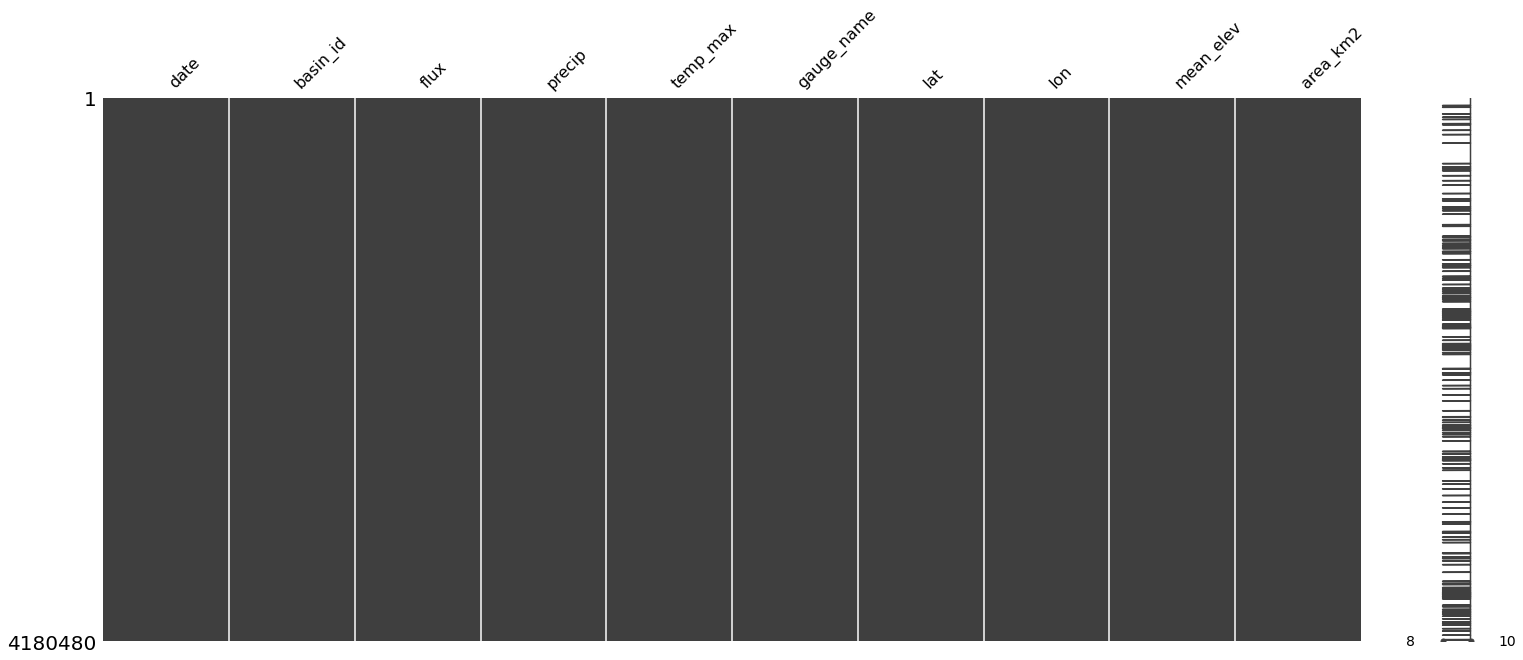

In [8]:
msngo.matrix(df)

In [9]:
df.isnull().value_counts()

date   basin_id  flux   precip  temp_max  gauge_name  lat    lon    mean_elev  area_km2
False  False     False  False   False     False       False  False  False      False       4175037
                        True    True      False       False  False  False      False          5443
dtype: int64

It is seen that 5443 records have no information for precipitations and maximum temperature, which represent a very low percentage anyway.

Since the date column is of an object type, a copy of it will be created as datetime type:

In [10]:
df['date2']=pd.to_datetime(df['date'])

The first and last 5 records of the dataset will be checked:

In [11]:
df.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,date2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-01
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-02
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-03
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-04
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-05


In [12]:
df.tail()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,date2
4180475,2020-06-02,12930001,0.375,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,2020-06-02
4180476,2020-06-03,12930001,0.342,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,2020-06-03
4180477,2020-06-04,12930001,0.325,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,2020-06-04
4180478,2020-06-05,12930001,0.311,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,2020-06-05
4180479,2020-06-06,12930001,0.294,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617,2020-06-06


Also the number of rows and columns will be checked:

In [13]:
df.shape

(4180480, 11)

Some statistics regarding the numerical variables:

In [14]:
df.describe()

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4.180480e+06,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06
mean,7.179757e+06,5.253340e+01,2.947445e+00,1.365728e+01,-3.569572e+01,-7.129595e+01,1.760129e+03,2.404876e+03
std,3.180965e+06,1.676027e+02,8.766749e+00,6.615037e+00,8.047659e+00,1.254339e+00,1.382121e+03,4.322051e+03
min,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,4.558001e+06,8.680000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,7.350003e+06,5.171000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04


Next the number of unique basins in the dataset will be checked: 

In [15]:
len(df.basin_id.unique())

503

And finally the number of days that the dataset contains data for:

In [16]:
len(df.date.unique())

14768

* There are 10 columns (plus 1 created) and 4180480 rows in the dataset
* There is data from 503 basins and 14768 days

A summarized dataset with only one row per watershed will be generated so the distribution of the numerical variables can be checked:

In [17]:
gauge_df=df.loc[:,['lat', 'lon', 'mean_elev', 'area_km2']].drop_duplicates().reset_index().drop(columns=['index'])

The distributions will be observed using boxplots:

In [18]:
plt.rcParams['figure.figsize']=(12, 8)

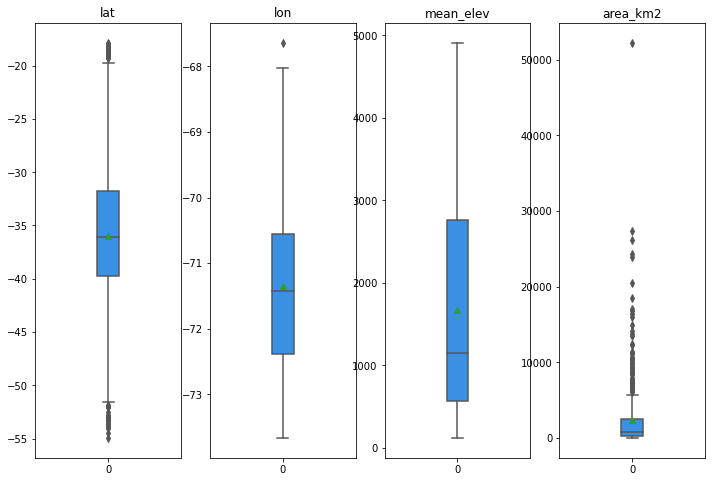

In [19]:
vars=list(gauge_df.columns)
fig, axes=plt.subplots(1, 4, sharey=False)

for i, n in enumerate(vars):
    sns.boxplot(ax=axes[i], data=gauge_df[n], color='dodgerblue', width=.15, showmeans=True).set_title(n)

* mean_elev is positively skewed.
* area_km2 is also positively skewed, and also shows the most outliers. 

<AxesSubplot:>

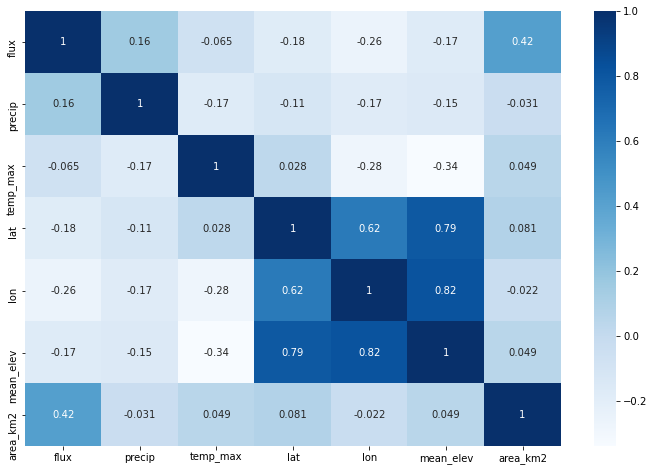

In [20]:
sns.heatmap(df.drop(columns='basin_id').corr(), cmap='Blues', annot=True)

The strongest correlations in the original dataset are seen between the geographical variables (e.g. latitude, longitud, mean_elevation, flux).

### Plotting flux, temperature and precipitations 

#### Plotting a single variable 

In [21]:
def plot_one_timeserie(cod_station, variable, min_date, max_date):
    #Name of basin is stored so it can be used to show it in the plot title:
    station_name=df[df['basin_id']==cod_station]['gauge_name'].unique()[0]
    #The subset to be plotted is stored in a new dataframe:
    to_plot=df[(df['basin_id']==cod_station) & (df['date2']>=min_date) & (df['date2']<=max_date)]
    #The subset is plotted using seaborn lineplot:
    sns.lineplot(data=to_plot, x="date2", y=variable)
    #The plot title is set:
    plt.title(f'Time series of the variable {variable} between {min_date} and {max_date} for the watershed {station_name}')

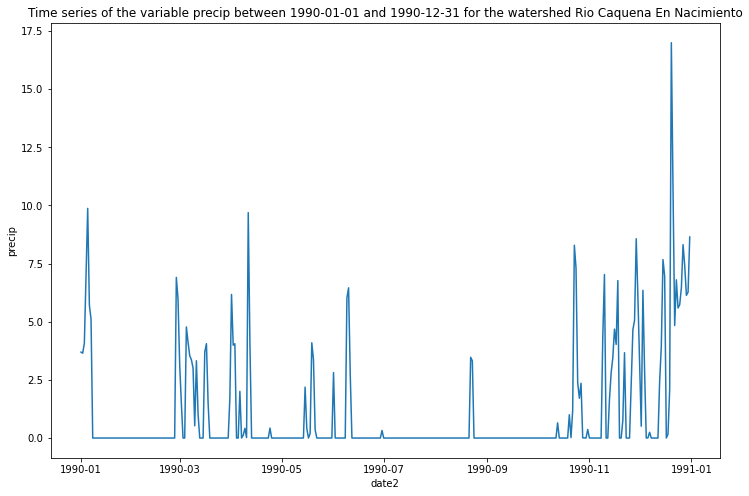

In [22]:
plot_one_timeserie(1001001, 'precip', '1990-01-01', '1990-12-31')

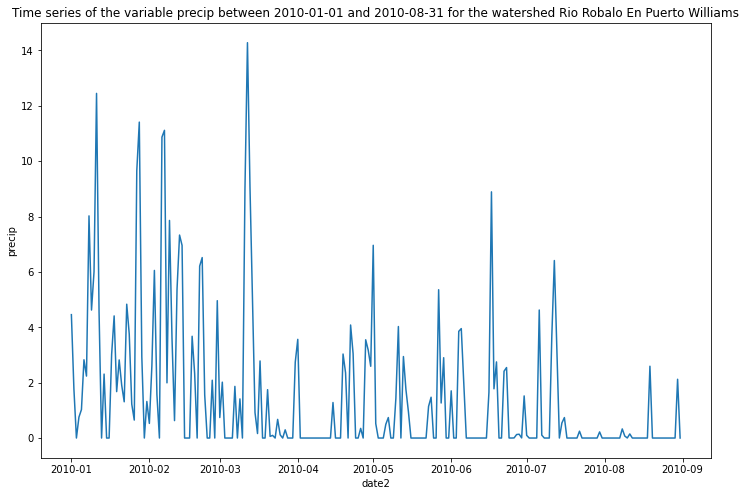

In [23]:
plot_one_timeserie(12930001, 'precip', '2010-01-01', '2010-08-31')

#### Plotting all three variables

In [24]:
#The StandardScaler function is imported so the variables to plot can be standardized
from sklearn.preprocessing import StandardScaler

In [25]:
def plot_three_timeseries(cod_station, min_date, max_date):
    #Name of basin is stored so it can be used to show it in the plot title:
    station_name=df[df['basin_id']==cod_station]['gauge_name'].unique()[0]
    #The subset containing the data to be plotted is stored in a new dataframe:
    filtered_df=df[(df['basin_id']==cod_station) & (df['date2']>=min_date) & (df['date2']<=max_date)]
    #A StandardScaler is called:
    scaler=StandardScaler()
    #The variables to plot are standardized:
    scaler.fit(filtered_df.loc[:,['flux', 'precip', 'temp_max']])
    #Once the variables were standardized, a new dataframe is created, which now contains the standardized variables:
    to_plot=pd.concat([filtered_df.reset_index(drop=True), pd.DataFrame(scaler.transform(filtered_df.loc[:,['flux', 'precip', 'temp_max']]), columns=['std_flux', 'std_precip', 'std_temp_max'])], axis=1)
    #The date variable is set as the dataframe index so it can be read as the x-axis in the lineplot:
    to_plot=to_plot.set_index('date2')
    #The plot is generated:
    sns.lineplot(data=to_plot.loc[:,['std_flux', 'std_precip', 'std_temp_max']])
    #The plot title is set:
    plt.title(f'Time series of the standardized flux, precipitations and maximum temperature between {min_date} and {max_date} for the watershed {station_name}')

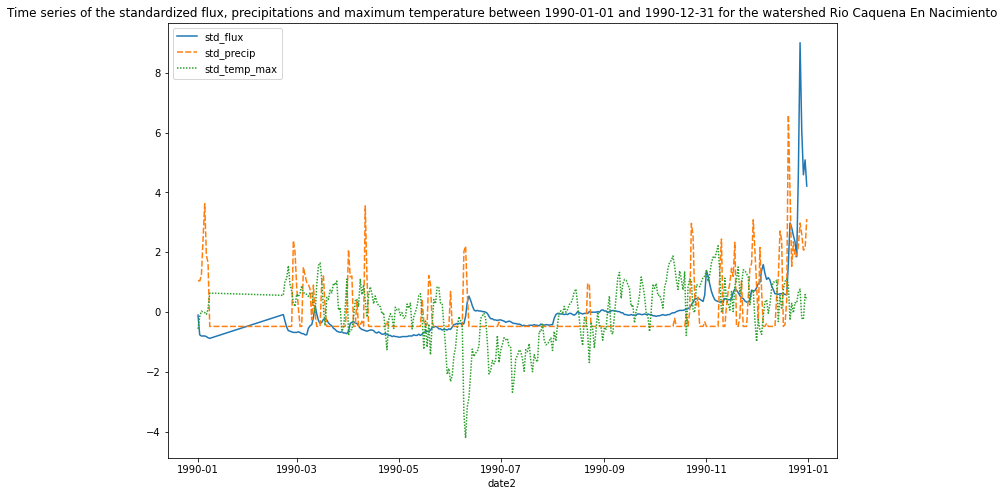

In [26]:
plot_three_timeseries(1001001, '1990-01-01', '1990-12-31')

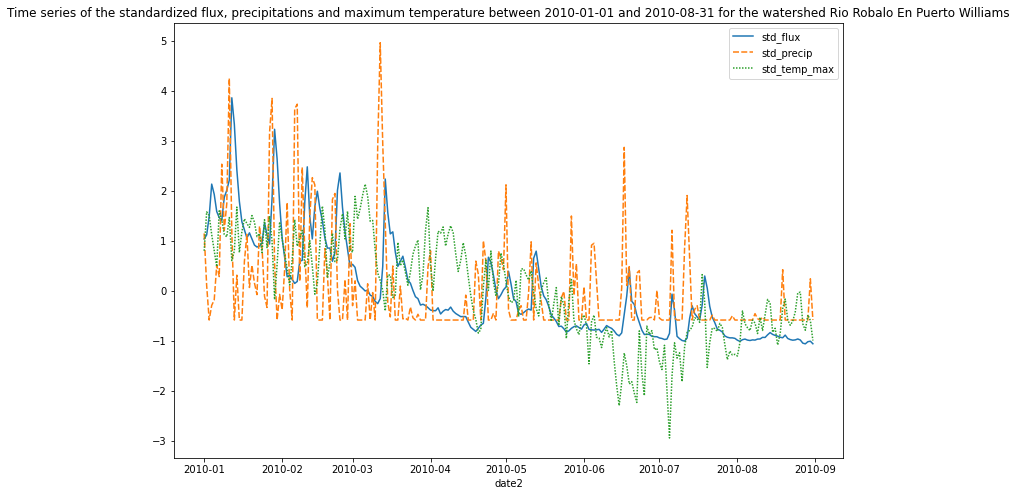

In [27]:
plot_three_timeseries(12930001, '2010-01-01', '2010-08-31')

### Creating variables for identifying extreme occurrences

In order to identify extreme occurrences of flux, precipitation and maximum temperature, they will be flagged as such when the value of the variable is greater than the 95% percentile for the season in which the date belongs (summer, autumn, winter and fall).

The first step will be creating a new variable called month_day which describes the month and day number the date is in:

In [28]:
df['month_day']=df['date2'].dt.month*100+df['date2'].dt.day

With the month and day stored in a single variable, the season variable can be created based on the date ranges each season is comprised:

In [29]:
#The column is created with null value at first that will be replaced using np.where functions which will determine the season the date belongs to based on the date range
df['season']=pd.Series(dtype='object')

The cases for autumn, winter and spring are explicitly defined since those seasons happen within the same year. For summer, it will be considered as the remaining case.

In [30]:
df['season']=np.where((df['month_day']>=321) & (df['month_day']<621),'autumn', 
                      np.where((df['month_day']>=621) & (df['month_day']<921),'winter', 
                               np.where((df['month_day']>=921) & (df['month_day']<1221),'spring', 
                                        df['season'])))

df['season']=np.where(pd.isna(df['season']), 'summer', df['season'])

The variable values outcome are checked:

In [31]:
df['season'].unique()

array(['summer', 'autumn', 'winter', 'spring'], dtype=object)

With the variable that allows seasons to be identified, the next step is to calculate the 95% percentile of each variable for each season. For this purpose, two lists will be created: one storing the season names, and other storing the variable names. Both lists will be looped over to subset the main dataframe and calculating the 95% percentile for each season/variable, which will be stored in a dictionary ("percentiles").

In [32]:
seasons=list(df['season'].unique())
seasons

['summer', 'autumn', 'winter', 'spring']

In [33]:
variables=['flux', 'precip', 'temp_max']
variables

['flux', 'precip', 'temp_max']

In [34]:
percentiles=dict()

for i in variables:
    for j in seasons:
        percentile=df[df['season']==j][i].quantile(q=0.95)
        percentiles[i+'_'+j]=percentile

In [35]:
percentiles

{'flux_summer': 162.0,
 'flux_autumn': 223.0,
 'flux_winter': 401.0,
 'flux_spring': 282.0,
 'precip_summer': 7.393520199999979,
 'precip_autumn': 24.752870999999903,
 'precip_winter': 27.09956279999999,
 'precip_spring': 11.283509999999998,
 'temp_max_summer': 28.294680999999994,
 'temp_max_autumn': 21.61569699999999,
 'temp_max_winter': 16.97973855,
 'temp_max_spring': 24.242860599999997}

Finally the flags will be created:

In [36]:
df['flux_extreme']=np.where((df[df['season']=='summer']['flux']>percentiles['flux_summer']) |
                           (df[df['season']=='autumn']['flux']>percentiles['flux_autumn']) |
                           (df[df['season']=='winter']['flux']>percentiles['flux_winter']) |
                           (df[df['season']=='spring']['flux']>percentiles['flux_spring']), 1, 0)

In [37]:
df['temp_extreme']=np.where((df[df['season']=='summer']['temp_max']>percentiles['temp_max_summer']) |
                           (df[df['season']=='autumn']['temp_max']>percentiles['temp_max_autumn']) |
                           (df[df['season']=='winter']['temp_max']>percentiles['temp_max_winter']) |
                           (df[df['season']=='spring']['temp_max']>percentiles['temp_max_spring']), 1, 0)

In [38]:
df['precip_extreme']=np.where((df[df['season']=='summer']['precip']>percentiles['precip_summer']) |
                           (df[df['season']=='autumn']['precip']>percentiles['precip_autumn']) |
                           (df[df['season']=='winter']['precip']>percentiles['precip_winter']) |
                           (df[df['season']=='spring']['precip']>percentiles['precip_spring']), 1, 0)

While I think this is an appropriate approach to identify extreme occurrences, I would also try something else based on the actual data distribution, such as calculating the superior limit of the distribution following the calculation method that is used in a box-plot (Q3+1.5 * intercuartile range). 

### Plotting the flux extremes

First thing to do is calculating the mean of extreme fluxes by basin:

In [39]:
flux_means=df.loc[:,['basin_id', 'flux_extreme']].groupby(by='basin_id').mean()
flux_means

,flux_extreme
basin_id,
1001001,0.0
1001002,0.0
1001003,0.0
1020002,0.0
1020003,0.0
...,...
12872001,0.0
12876001,0.0
12876004,0.0


Then the means can be plotted, in this case a barplot will be used. The basin_id's, used as identifiers, are shown as x-axis but cannot be distinguished because of the amount of different basins, however this is not considered relevant in this case since the matter of interest is to observe if there are differences between the means. 

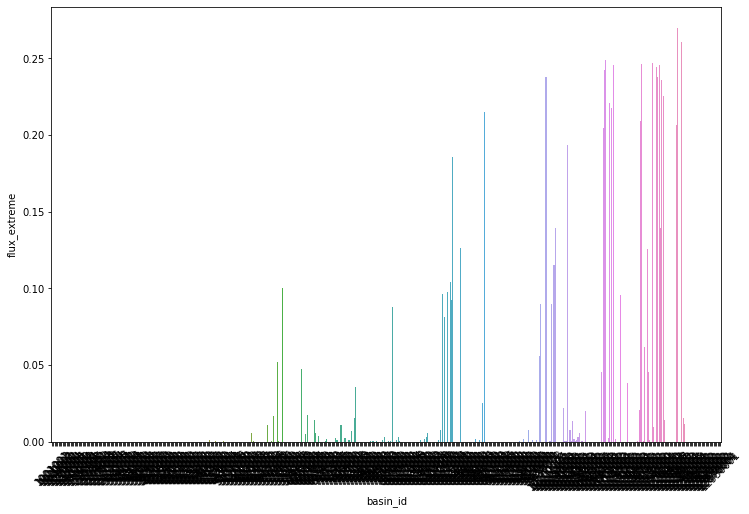

In [40]:
sns.barplot(y='flux_extreme', x=flux_means.index, data=flux_means).tick_params(axis='x', rotation=45)

As the plot shows, the bars of different sizes demonstrate that there are different behaviors between watersheds, with the means of extreme fluxes ranging between 0 and approximately 0.28.

### Plotting the percentage of flux extremes during time

For this point, instead of calculating the mean for the basins, the calculation will be done for each day.

In [41]:
flux_daily_means=df.loc[:,['date2', 'flux_extreme']].groupby(by='date2').mean()
flux_daily_means

,flux_extreme
date2,
1980-01-01,0.041667
1980-01-02,0.031414
1980-01-03,0.031414
1980-01-04,0.031088
1980-01-05,0.031414
...,...
2020-06-02,0.000000
2020-06-03,0.000000
2020-06-04,0.000000


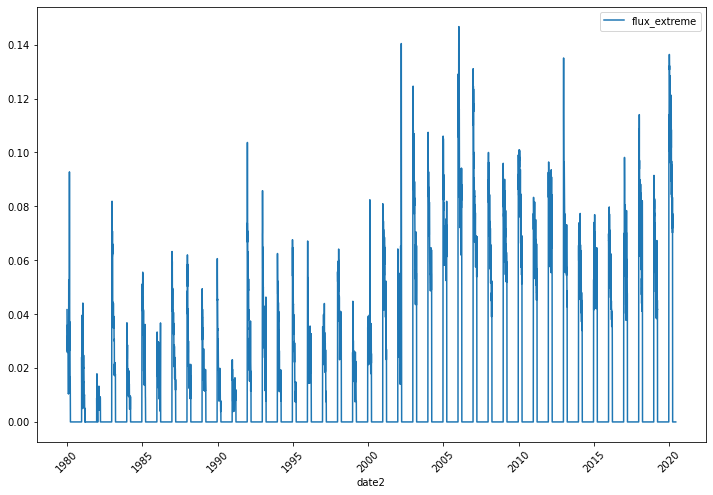

In [42]:
sns.lineplot(data=flux_daily_means).tick_params(axis='x', rotation=45)

From the plot it can be seen that the percentage of extreme flux events has increased since approximately 2002, and while it still shows fluctuations over the years, even the lower peaks are higher than the ones seen prior to 2002.

### Predicting extreme flux events

In order to build models for predicting extreme flux events, the data to use for each observation will be transformed so it can also capture the recent past behavior of the variables instead of using the data of the same day, since this data will probably be self-explanatory (for example, it would be expected that the flux increases in a day if there are precipitations happening). Considering this, the original flux, precipitation and temperature variables will be averaged so each record contains the mean of the three days before of the date for each record. These transformations set a constraint for the model so it needs to be used with at least the records of the three days before.

Additionally, the variables related to geographical characteristics of the basin (latitude, longitude, mean elevation and area) will also be used, since flux showed to have some degree of correlation with them from what was observed from the correlation matrix some steps before. Finally, the year and season in which the date of the record belongs will be used, since there are differences in the values depending on the season, but also on the year (an increase in extreme events has been seen). Even if the model is used only for future predictions as a natural matter of interest, the fact that the models are trained distinguishing the years in which the records happened is expected to generate an improvement in the results.

Let's check how the dataframe looks since the last transformations: 

In [43]:
df.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,date2,month_day,season,flux_extreme,temp_extreme,precip_extreme
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-01,101,summer,0,0,0
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-02,102,summer,0,0,0
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-03,103,summer,0,0,0
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-04,104,summer,0,0,0
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-05,105,summer,0,0,0


The next steps will be to do the transformations that were mentioned before:

#### Year variable 

In [44]:
df['year']=df['date2'].dt.year

#### Generation of flags for season variables 

The encoding process will done using the OneHotEncoder library:

In [45]:
from sklearn.preprocessing import OneHotEncoder

#The encoder object is instanced. Flags won't be generated for one of the seasons so collinearity is avoided:
encoder=OneHotEncoder(drop='first').fit(df['season'].values.reshape(-1,1))
#The transformation is made:
transformed_season=encoder.transform(df['season'].values.reshape(-1,1))
#A new dataframe with the recoded variables is created:
transformed_season_df=pd.DataFrame(transformed_season.toarray(), columns=encoder.get_feature_names()).reset_index(drop=True)
#The name of the new dummy variables is changed so the "x0_" prefix is deleted:
transformed_season_df.columns=transformed_season_df.columns.str.replace("x0_", 'season_')
#The new dataframe is added to the original one:
df=pd.concat([df, transformed_season_df], axis=1)
#The previous column that represented seasons is deleted:
df=df.drop(columns='season')

C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


This is how the dataframe looks after encoding the season variable:

In [46]:
df.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,date2,month_day,flux_extreme,temp_extreme,precip_extreme,year,season_spring,season_summer,season_winter
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-01,101,0,0,0,1980,0.0,1.0,0.0
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-02,102,0,0,0,1980,0.0,1.0,0.0
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-03,103,0,0,0,1980,0.0,1.0,0.0
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-04,104,0,0,0,1980,0.0,1.0,0.0
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,1980-01-05,105,0,0,0,1980,0.0,1.0,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            object        
 1   basin_id        int64         
 2   flux            float64       
 3   precip          float64       
 4   temp_max        float64       
 5   gauge_name      object        
 6   lat             float64       
 7   lon             float64       
 8   mean_elev       float64       
 9   area_km2        float64       
 10  date2           datetime64[ns]
 11  month_day       int64         
 12  flux_extreme    int32         
 13  temp_extreme    int32         
 14  precip_extreme  int32         
 15  year            int64         
 16  season_spring   float64       
 17  season_summer   float64       
 18  season_winter   float64       
dtypes: datetime64[ns](1), float64(10), int32(3), int64(3), object(2)
memory usage: 558.2+ MB


#### Calculating the rolling means 

In order to calculate the means of the flux, precipitation and temperature variables, this will be done over a separate subset of the dataframe, using only the columns of interest plus the basin_id in order to establish to what the means being calculated correspond.

In [48]:
sub_df=df.loc[:,['date2', 'basin_id', 'flux', 'precip', 'temp_max']]
sub_df.head()

,date2,basin_id,flux,precip,temp_max
0,1980-01-01,1001001,0.579,0.0,10.685653
1,1980-01-02,1001001,0.543,0.0,11.470960
2,1980-01-03,1001001,0.482,0.0,11.947457
3,1980-01-04,1001001,0.459,0.0,12.424489
4,1980-01-05,1001001,0.436,0.0,12.649203


Now with the subset the means will be calculated:

In [49]:
#The rolling function will be used for calculating the average, setting the window parameter to 4, since it uses the 3 previous records plus the "current" one
means_df=pd.concat(d.rolling(window=4).mean() for _, d in sub_df.groupby('basin_id'))
means_df.head()

,basin_id,flux,precip,temp_max
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,1001001.0,0.51575,0.0,11.632140
4,1001001.0,0.48000,0.0,12.123027


From observing the first 5 rows in the means dataframe we can see that:

- For the first 3 records there is no information, since the calculation for each basin/date requires 4 records, including the current one
- The calculated averages include the values for the current day, this will be modified later so the current values are removed from the mean

The correct outcome of the calculation can also be noticed by looking at a subset of rows where the basin_id changes. For example, the following is a subset where the basin_id changes from 1001001 to 1001002 (rows 6124-6125):

In [50]:
df.iloc[6120:6130,:]

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,date2,month_day,flux_extreme,temp_extreme,precip_extreme,year,season_spring,season_summer,season_winter
6120,2004-05-21,1001001,0.446,0.0,6.242006,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,2004-05-21,521,0,0,0,2004,0.0,0.0,0.0
6121,2004-05-22,1001001,0.447,0.0,5.799222,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,2004-05-22,522,0,0,0,2004,0.0,0.0,0.0
6122,2004-05-23,1001001,0.449,0.0,4.958884,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,2004-05-23,523,0,0,0,2004,0.0,0.0,0.0
6123,2004-05-24,1001001,0.449,0.0,5.671681,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,2004-05-24,524,0,0,0,2004,0.0,0.0,0.0
6124,2004-05-25,1001001,0.451,0.0,5.981349,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,2004-05-25,525,0,0,0,2004,0.0,0.0,0.0
6125,1980-01-01,1001002,1.620,0.0,11.287282,Rio Caquena En Vertedero,-17.9942,-69.2550,4652.603986,467.556222,1980-01-01,101,0,0,0,1980,0.0,1.0,0.0
6126,1980-01-02,1001002,1.240,0.0,12.078774,Rio Caquena En Vertedero,-17.9942,-69.2550,4652.603986,467.556222,1980-01-02,102,0,0,0,1980,0.0,1.0,0.0
6127,1980-01-03,1001002,1.010,0.0,12.563833,Rio Caquena En Vertedero,-17.9942,-69.2550,4652.603986,467.556222,1980-01-03,103,0,0,0,1980,0.0,1.0,0.0
6128,1980-01-04,1001002,0.830,0.0,13.077723,Rio Caquena En Vertedero,-17.9942,-69.2550,4652.603986,467.556222,1980-01-04,104,0,0,0,1980,0.0,1.0,0.0
6129,1980-01-05,1001002,0.753,0.0,13.316867,Rio Caquena En Vertedero,-17.9942,-69.2550,4652.603986,467.556222,1980-01-05,105,0,0,0,1980,0.0,1.0,0.0


Now the same rows in the means dataframe are checked:

In [51]:
means_df.iloc[6120:6130,:]

,basin_id,flux,precip,temp_max
6120,1001001.0,0.44300,2.843559e-14,6.367594
6121,1001001.0,0.44425,2.843559e-14,6.173390
6122,1001001.0,0.44625,2.843559e-14,5.782967
6123,1001001.0,0.44775,2.843559e-14,5.667948
6124,1001001.0,0.44900,2.843559e-14,5.602784
6125,NaN,NaN,NaN,NaN
6126,NaN,NaN,NaN,NaN
6127,NaN,NaN,NaN,NaN
6128,1001002.0,1.17500,0.000000e+00,12.251903
6129,1001002.0,0.95825,0.000000e+00,12.759299


Before adding the new columns to the original dataframe, they will be renamed:

In [52]:
means_df.rename(columns = {'basin_id': 'basin_id2','flux':'flux_3d', 
                           'precip':'precip_3d', 'temp_max':'temp_max_3d'}, inplace = True)

The columns are added:

In [53]:
df_final=pd.concat([df, means_df], axis=1)

Finally, now with the current date data and the calculated means, the correction to the means calculations described before will be done:

In [54]:
df_final['flux_3d']=(df_final['flux_3d']*4-df_final['flux'])/3
df_final['precip_3d']=(df_final['precip_3d']*4-df_final['precip'])/3
df_final['temp_max_3d']=(df_final['temp_max_3d']*4-df_final['temp_max'])/3

#### Selecting only the necessary columns 

With the dataframe already put together, in order to train and test the models, only the relevant variables need to be kept. For this purpose, a dataframe containing only the subset of relevant columns will be created: 

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 23 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            object        
 1   basin_id        int64         
 2   flux            float64       
 3   precip          float64       
 4   temp_max        float64       
 5   gauge_name      object        
 6   lat             float64       
 7   lon             float64       
 8   mean_elev       float64       
 9   area_km2        float64       
 10  date2           datetime64[ns]
 11  month_day       int64         
 12  flux_extreme    int32         
 13  temp_extreme    int32         
 14  precip_extreme  int32         
 15  year            int64         
 16  season_spring   float64       
 17  season_summer   float64       
 18  season_winter   float64       
 19  basin_id2       float64       
 20  flux_3d         float64       
 21  precip_3d       float64       
 22  temp_max_3d     fl

In [56]:
model_df=df_final.loc[:,['lat', 'lon', 'mean_elev', 'area_km2', 'flux_extreme', 'year', 'season_spring', 'season_summer', 'season_winter', 
                         'flux_3d', 'precip_3d', 'temp_max_3d']]
model_df.head()

,lat,lon,mean_elev,area_km2,flux_extreme,year,season_spring,season_summer,season_winter,flux_3d,precip_3d,temp_max_3d
0,-18.0769,-69.1961,4842.449328,49.711859,0,1980,0.0,1.0,0.0,NaN,NaN,NaN
1,-18.0769,-69.1961,4842.449328,49.711859,0,1980,0.0,1.0,0.0,NaN,NaN,NaN
2,-18.0769,-69.1961,4842.449328,49.711859,0,1980,0.0,1.0,0.0,NaN,NaN,NaN
3,-18.0769,-69.1961,4842.449328,49.711859,0,1980,0.0,1.0,0.0,0.534667,0.0,11.368023
4,-18.0769,-69.1961,4842.449328,49.711859,0,1980,0.0,1.0,0.0,0.494667,0.0,11.947635


As it can be seen from the first 5 rows, there are null values in the dataset, which will be dropped before starting to train models:

In [57]:
model_df=model_df.dropna()

#### Testing models 

Four candidate models will be tried:

- **Bernoulli Naive Bayes Classifier**
- **Logistic Regression**
- **Decision Tree Classifier** with max depth=1
- **Decision Tree Classifier** with max depth=4

In [58]:
#Test and train datasets will be defined, using 33% of the data for testing and 67% for training:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns='flux_extreme'), model_df['flux_extreme'], test_size=.33, random_state=1812)

In [70]:
#Model modules are imported:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

##### Model training 

In [72]:
nb = BernoulliNB().fit(X_train, y_train)
log_reg=LogisticRegression(random_state=1812).fit(X_train, y_train)
dec_tree_md1=DecisionTreeClassifier(max_depth=1, random_state=1812).fit(X_train, y_train)
dec_tree_md4=DecisionTreeClassifier(max_depth=4, random_state=1812).fit(X_train, y_train)

C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Generating predictions on test dataset

In [73]:
nb_yhat=nb.predict(X_test)
log_reg_yhat=log_reg.predict(X_test)
dec_tree_md1_yhat=dec_tree_md1.predict(X_test)
dec_tree_md4_yhat=dec_tree_md4.predict(X_test)

### Analyzing model results

#### Checking performances 

In [74]:
print('Naive Bayes performance:\n')
print(classification_report(y_test, nb_yhat))
print('*'*55)
print('Logistic Regression performance:\n')
print(classification_report(y_test, log_reg_yhat))
print('*'*55)
print('Decision Tree (Max Depth=1) performance:\n')
print(classification_report(y_test, dec_tree_md1_yhat))
print('*'*55)
print('Decision Tree (Max Depth=4) performance:\n')
print(classification_report(y_test, dec_tree_md4_yhat))
print('*'*55)

Naive Bayes performance:



C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1360225
           1       0.00      0.00      0.00     17040

    accuracy                           0.99   1377265
   macro avg       0.49      0.50      0.50   1377265
weighted avg       0.98      0.99      0.98   1377265

*******************************************************
Logistic Regression performance:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1360225
           1       0.56      0.16      0.25     17040

    accuracy                           0.99   1377265
   macro avg       0.77      0.58      0.62   1377265
weighted avg       0.98      0.99      0.98   1377265

*******************************************************
Decision Tree (Max Depth=1) performance:



C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neo_r\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1360225
           1       0.00      0.00      0.00     17040

    accuracy                           0.99   1377265
   macro avg       0.49      0.50      0.50   1377265
weighted avg       0.98      0.99      0.98   1377265

*******************************************************
Decision Tree (Max Depth=4) performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1360225
           1       0.94      0.92      0.93     17040

    accuracy                           1.00   1377265
   macro avg       0.97      0.96      0.97   1377265
weighted avg       1.00      1.00      1.00   1377265

*******************************************************


After observing the classification reports of the four candidate models, the best model is the Decision Tree with max depth=4: it shows a perfect performance when predicting the class 0 (no extreme flux), and it also shows a very good performance when predicting class 1 (extreme flux), since it correctly predicts in the 94% of the cases, and it captures 92% of the actual events.

In this model it is important to have good performance metrics specially in the case of class 1, since it is the class of interest: in the context of this problem, it is more important to know for sure when an extreme flux event is going to happen so any cautionary measures can be taken.

In terms of the importance of the variables being used, it can be checked using the feature_importances attribute of the decision tree model. The next step will put side by side the variable names and the feature importances scores given by the model:

In [90]:
pd.concat([pd.Series(model_df.drop(columns='flux_extreme').columns), pd.Series(dec_tree_md4.feature_importances_)], axis=1)

,0,1
0,lat,0.000000
1,lon,0.000000
2,mean_elev,0.000000
3,area_km2,0.000000
4,year,0.000000
5,season_spring,0.000000
6,season_summer,0.829517
7,season_winter,0.000000
8,flux_3d,0.168117
9,precip_3d,0.002366


As it can be seen, there are only three variables which are of importance:

- Either if the observation corresponds to the summer season or not
- The flux of the last 3 days
- The precipitations of the last 3 days

#### What if the 70% of extreme flux events needs to be identified? 

This model works good in the case of identifying at least 70 